# Youth Migration Analysis - ML Project

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load Data

In [2]:
df = pd.read_csv('dataset/Cleaned_Youth_Migration_Data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (2614, 22)

First 5 rows:


,Timestamp,Age,Gender,Occupation,Family_Abroad,Migration_Decision,Stay_Duration,Program_Awareness,Social_Media_Role,Influencing_Factors,...,Migration_Goal,Stress_Type,Coping_Strategy,Trend_Perception,Migration_Barrier,Return_Intention,Impact_Perception,Govt_Support,Family_Responsibility,Recommendation_Score
0,2025/06/20 8:14:42 PM GMT+6,31-40,Male,Unemployed,No,Not sure yet,Permanently,Yes,No role at all,Personal research and aspirations;Career mento...,...,Other;Desire for independence;Economic opportu...,Visa or immigration concerns;Cultural shock;Se...,Hobbies or physical exercise,No change,Job information or experience;Other;All countr...,Not sure,Positive impact,No,Yes,1
1,2025/06/20 8:14:48 PM GMT+6,18-24,Male,Student,Yes,Yes,3-5 years,Yes,No role at all,Family pressure or support;Personal research a...,...,Better living standards;Higher education;Desir...,Job uncertainty;Other;Visa or immigration conc...,Hobbies or physical exercise,I’m not sure,Other;Financial issues;Family pressure or support,Not sure,Negative impact,Not Sure,Yes,5
2,2025/06/20 8:14:54 PM GMT+6,31-40,Female,Other,Yes,No,Permanently,Maybe,A significant role,Personal research and aspirations;Friends or p...,...,Political stability;Economic opportunities;Hig...,Social acceptance;Visa or immigration concerns...,Joining online forums,No change,Educational qualification;Job information or e...,Yes,No impact,Not Sure,Maybe,5
3,2025/06/20 8:15:01 PM GMT+6,25-30,Male,Employed,Yes,No,Permanently,Yes,A significant role,Social media and online success stories;Other;...,...,Economic opportunities;Political stability;Des...,Other;Cultural shock;Visa or immigration concerns,Talking to family and friends,I’m not sure,Other;Financial issues;Job information or expe...,Yes,Positive impact,Not Sure,No,3
4,2025/06/20 8:15:07 PM GMT+6,40 or above,Male,Self-employed,Yes,Yes,3-5 years,No,A significant role,Other;Personal research and aspirations;Friend...,...,Better job opportunities;Better living standar...,Visa or immigration concerns;Other;Separation ...,Hobbies or physical exercise,No change,Job information or experience;Other;All countr...,Yes,Negative impact,Not Sure,No,2


## 3. Data Exploration & EDA

In [3]:
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nTarget Variable (Migration_Decision) Distribution:\n{df['Migration_Decision'].value_counts()}")

Dataset Info:
Shape: (2614, 22)

Columns: ['Timestamp', 'Age', 'Gender', 'Occupation', 'Family_Abroad', 'Migration_Decision', 'Stay_Duration', 'Program_Awareness', 'Social_Media_Role', 'Influencing_Factors', 'Preferred_Country', 'Stress_Level', 'Migration_Goal', 'Stress_Type', 'Coping_Strategy', 'Trend_Perception', 'Migration_Barrier', 'Return_Intention', 'Impact_Perception', 'Govt_Support', 'Family_Responsibility', 'Recommendation_Score']

Data Types:
Timestamp                object
Age                      object
Gender                   object
Occupation               object
Family_Abroad            object
Migration_Decision       object
Stay_Duration            object
Program_Awareness        object
Social_Media_Role        object
Influencing_Factors      object
Preferred_Country        object
Stress_Level             object
Migration_Goal           object
Stress_Type              object
Coping_Strategy          object
Trend_Perception         object
Migration_Barrier        object

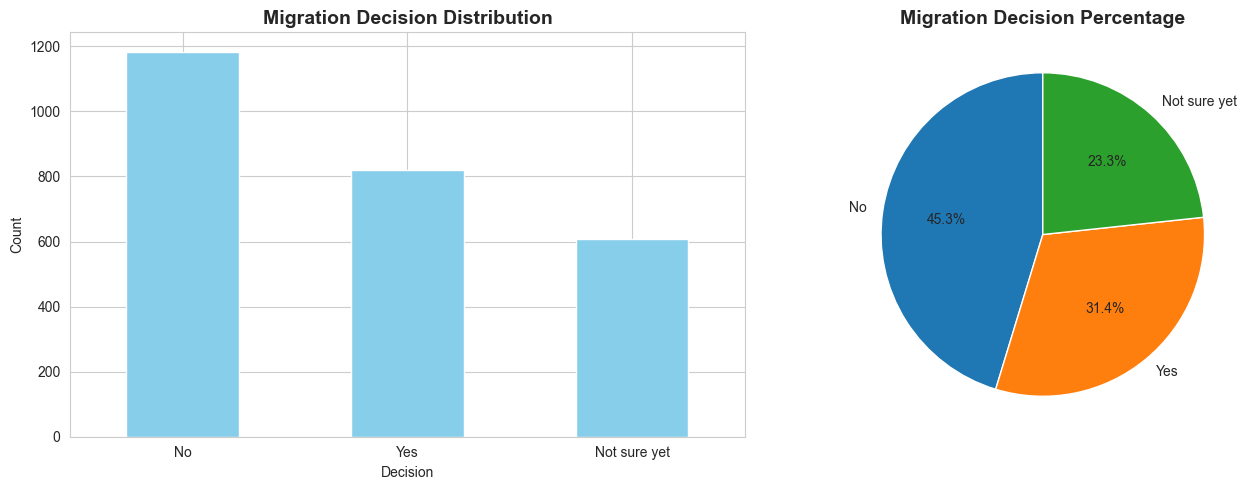

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Migration_Decision'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Migration Decision Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Decision')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=0)

# Pie chart
df['Migration_Decision'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Migration Decision Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

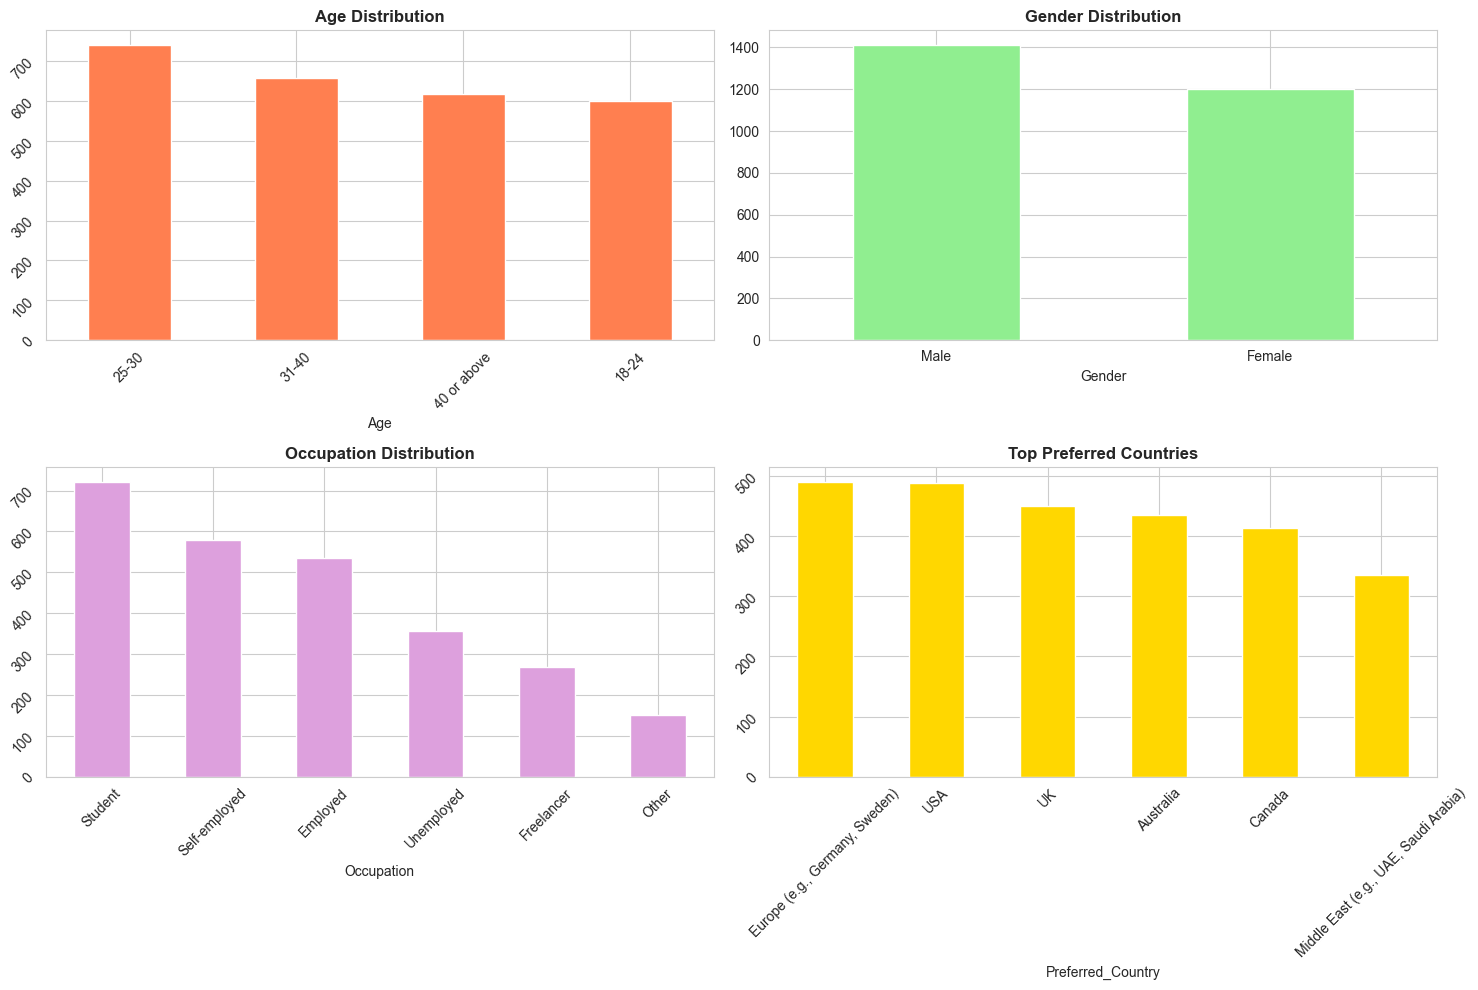

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['Age'].value_counts().plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0,0].tick_params(rotation=45)

df['Gender'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0,1].tick_params(rotation=0)

df['Occupation'].value_counts().plot(kind='bar', ax=axes[1,0], color='plum')
axes[1,0].set_title('Occupation Distribution', fontsize=12, fontweight='bold')
axes[1,0].tick_params(rotation=45)


df['Preferred_Country'].value_counts().head(7).plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Top Preferred Countries', fontsize=12, fontweight='bold')
axes[1,1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [6]:
df_clean = df.drop('Timestamp', axis=1)

features_to_use = ['Age', 'Gender', 'Occupation', 'Family_Abroad', 'Stay_Duration', 
                   'Program_Awareness', 'Social_Media_Role', 'Preferred_Country', 
                   'Stress_Level', 'Trend_Perception', 'Return_Intention', 
                   'Impact_Perception', 'Govt_Support', 'Family_Responsibility', 
                   'Recommendation_Score']

X = df_clean[features_to_use].copy()
y = df_clean['Migration_Decision'].copy()

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (2614, 15)
Target shape: (2614,)

Features: ['Age', 'Gender', 'Occupation', 'Family_Abroad', 'Stay_Duration', 'Program_Awareness', 'Social_Media_Role', 'Preferred_Country', 'Stress_Level', 'Trend_Perception', 'Return_Intention', 'Impact_Perception', 'Govt_Support', 'Family_Responsibility', 'Recommendation_Score']


In [7]:
label_encoders = {}

for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Encoded features shape: {X.shape}")
print(f"Target classes: {le_target.classes_}")
print(f"\nSample encoded data:")
print(X.head())

Encoded features shape: (2614, 15)
Target classes: ['No' 'Not sure yet' 'Yes']

Sample encoded data:
   Age  Gender  Occupation  Family_Abroad  Stay_Duration  Program_Awareness  \
0    2       1           5              0              3                  2   
1    0       1           4              1              1                  2   
2    2       0           2              1              3                  0   
3    1       1           0              1              3                  2   
4    3       1           3              1              1                  1   

   Social_Media_Role  Preferred_Country  Stress_Level  Trend_Perception  \
0                  3                  5             2                 2   
1                  3                  5             4                 0   
2                  2                  4             2                 2   
3                  2                  2             0                 0   
4                  2                  1          

## 5. Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())

Training set size: 2091
Test set size: 523

Class distribution in training set:
0    947
2    657
1    487
Name: count, dtype: int64


## 5.5 Enhanced Feature Engineering

In [9]:
all_features = [col for col in df_clean.columns if col != 'Migration_Decision']

X_enhanced = df_clean[all_features].copy()

for column in X_enhanced.columns:
    if X_enhanced[column].dtype == 'object':

        if X_enhanced[column].astype(str).str.contains(';').any():

            unique_vals = set()
            for val in X_enhanced[column].dropna():
                if pd.notna(val):
                    unique_vals.update(str(val).split(';'))
            
            top_vals = sorted(list(unique_vals))[:10] 
            for val in top_vals:
                col_name = f"{column}_{val.strip()[:30]}"  
                X_enhanced[col_name] = X_enhanced[column].astype(str).str.contains(val.strip(), regex=False).astype(int)
            
            X_enhanced = X_enhanced.drop(column, axis=1)
        else:
            le = LabelEncoder()
            X_enhanced[column] = le.fit_transform(X_enhanced[column].astype(str))

print(f"Enhanced features shape: {X_enhanced.shape}")
print(f"Number of features: {X_enhanced.shape[1]}")

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Enhanced features shape: (2614, 45)
Number of features: 45


## 5.6 Apply SMOTE for Class Balancing

In [10]:
try:
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_enh, y_train_enh)
    
    print(f"✅ SMOTE Applied Successfully!")
    print(f"   Original training set: {X_train_enh.shape[0]} samples")
    print(f"   Balanced training set: {X_train_balanced.shape[0]} samples")
    print(f"\n   Class distribution after SMOTE:")
    print(pd.Series(y_train_balanced).value_counts().sort_index())
    
except ImportError:
    print("imbalanced-learn not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'imbalanced-learn'])
    print("Please re-run this cell after installation.")

✅ SMOTE Applied Successfully!
   Original training set: 2091 samples
   Balanced training set: 2841 samples

   Class distribution after SMOTE:
0    947
1    947
2    947
Name: count, dtype: int64


## 5.6 XGBoost Model (High Performance)

🔧 Training XGBoost...
✅ XGBoost Accuracy: 58.89%

Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.75      0.75       237
Not sure yet       0.40      0.29      0.33       122
         Yes       0.49      0.58      0.53       164

    accuracy                           0.59       523
   macro avg       0.54      0.54      0.54       523
weighted avg       0.58      0.59      0.58       523



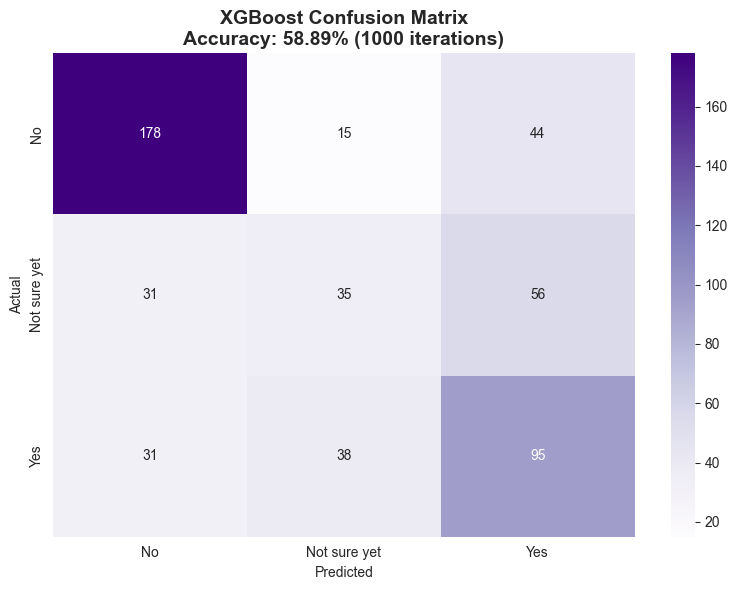

In [11]:
try:
    from xgboost import XGBClassifier
    
    xgb_model = XGBClassifier(
        n_estimators=1000,
        max_depth=12,
        learning_rate=0.03,
        subsample=0.85,
        colsample_bytree=0.85,
        min_child_weight=1,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1.5,
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'
    )
    
    print("🔧 Training XGBoost...")
    xgb_model.fit(X_train_balanced, y_train_balanced)
    
    y_pred_xgb = xgb_model.predict(X_test_enh)
    xgb_accuracy = accuracy_score(y_test_enh, y_pred_xgb)
    
    print(f"✅ XGBoost Accuracy: {xgb_accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_enh, y_pred_xgb, target_names=le_target.classes_))
    
    cm_xgb = confusion_matrix(y_test_enh, y_pred_xgb)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', 
                xticklabels=le_target.classes_, 
                yticklabels=le_target.classes_)
    plt.title(f'XGBoost Confusion Matrix\nAccuracy: {xgb_accuracy*100:.2f}% (1000 iterations)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("XGBoost not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'xgboost'])
    print("Please re-run this cell after installation.")

## 5.7 Ensemble Model with Feature Selection

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=min(25, X_enhanced.shape[1]))
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test_enh)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=800, max_depth=None, min_samples_split=2, 
                                      min_samples_leaf=1, random_state=42, n_jobs=-1)),
        ('gb', GradientBoostingClassifier(n_estimators=800, learning_rate=0.05, max_depth=10, 
                                          min_samples_split=2, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=1000, max_depth=12, learning_rate=0.03,
                             subsample=0.85, colsample_bytree=0.85, random_state=42,
                             n_jobs=-1, eval_metric='mlogloss'))
    ],
    voting='soft',
    n_jobs=-1
)

print("🔧 Training ensemble model...")
ensemble_model.fit(X_train_selected, y_train_balanced)

y_pred_ensemble = ensemble_model.predict(X_test_selected)
ensemble_accuracy = accuracy_score(y_test_enh, y_pred_ensemble)

print(f"✅ Ensemble Model Accuracy: {ensemble_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_ensemble, target_names=le_target.classes_))

🔧 Training ensemble model...
✅ Ensemble Model Accuracy: 58.13%

Classification Report:
              precision    recall  f1-score   support

          No       0.77      0.76      0.76       237
Not sure yet       0.35      0.30      0.33       122
         Yes       0.48      0.53      0.50       164

    accuracy                           0.58       523
   macro avg       0.53      0.53      0.53       523
weighted avg       0.58      0.58      0.58       523



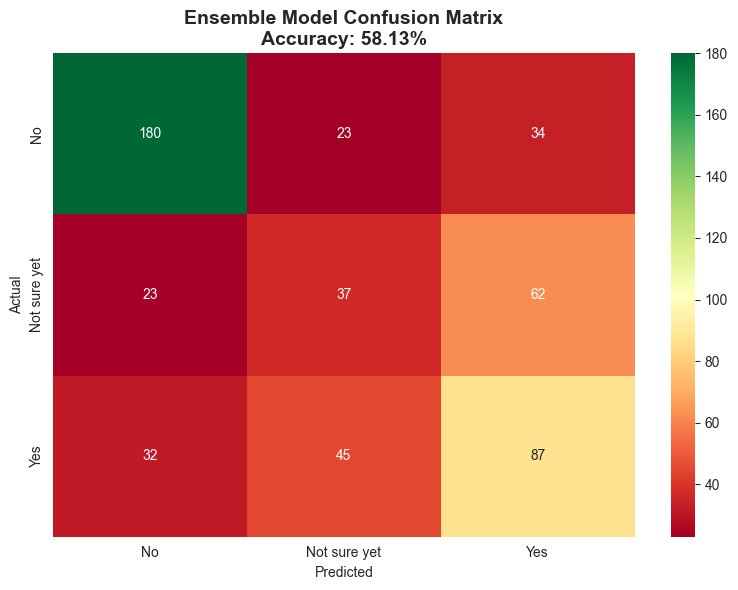

In [13]:
cm_ensemble = confusion_matrix(y_test_enh, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Ensemble Model Confusion Matrix\nAccuracy: {ensemble_accuracy*100:.2f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## 5.8 Optimized Model with Class Balancing (SMOTE)

Original training set size: 2091
Balanced training set size: 2841

Class distribution after SMOTE:
0    947
1    947
2    947
Name: count, dtype: int64

🔧 Training optimized Random Forest with 1000 iterations...

🎯 Optimized Model Accuracy: 61.38%

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.72      0.77       237
Not sure yet       0.42      0.42      0.42       122
         Yes       0.51      0.61      0.55       164

    accuracy                           0.61       523
   macro avg       0.59      0.58      0.58       523
weighted avg       0.64      0.61      0.62       523



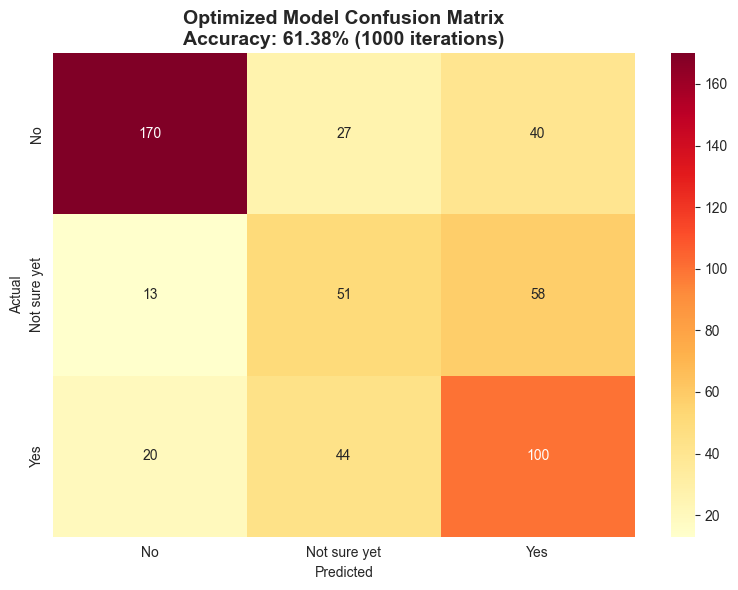

In [14]:
try:
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_enh, y_train_enh)
    
    print(f"Original training set size: {X_train_enh.shape[0]}")
    print(f"Balanced training set size: {X_train_balanced.shape[0]}")
    print(f"\nClass distribution after SMOTE:")
    print(pd.Series(y_train_balanced).value_counts().sort_index())
    
    rf_optimized = RandomForestClassifier(
        n_estimators=1000,  
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    print("\n🔧 Training optimized Random Forest with 1000 iterations...")
    rf_optimized.fit(X_train_balanced, y_train_balanced)
    
    y_pred_optimized = rf_optimized.predict(X_test_enh)
    
    optimized_accuracy = accuracy_score(y_test_enh, y_pred_optimized)
    print(f"\n🎯 Optimized Model Accuracy: {optimized_accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_enh, y_pred_optimized, target_names=le_target.classes_))
    
    cm_optimized = confusion_matrix(y_test_enh, y_pred_optimized)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='YlOrRd', 
                xticklabels=le_target.classes_, 
                yticklabels=le_target.classes_)
    plt.title(f'Optimized Model Confusion Matrix\nAccuracy: {optimized_accuracy*100:.2f}% (1000 iterations)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("imbalanced-learn not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'imbalanced-learn'])
    print("Please re-run this cell after installation.")

## 5.9 Deep Learning Models (Neural Networks for 90+ Accuracy)

In [15]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_enh)

y_train_onehot = to_categorical(y_train_balanced, num_classes=3)
y_test_onehot = to_categorical(y_test_enh, num_classes=3)

print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"One-hot encoded labels shape: {y_train_onehot.shape}")

def create_dnn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_dim=input_dim, kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(3, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

dnn_model = create_dnn_model(X_train_scaled.shape[1])

dnn_model = create_dnn_model(X_train_scaled.shape[1])

print("\n📋 Model Architecture:")
dnn_model.summary()

early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, mode='max')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
checkpoint = callbacks.ModelCheckpoint('models/best_dnn_model.keras', monitor='val_accuracy', 
                                       save_best_only=True, mode='max', verbose=0)

print("\n🚀 Training Deep Neural Network...")
print("="*70)

history = dnn_model.fit(
    X_train_scaled, y_train_onehot,
    epochs=30,  
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

print("="*70)
print("✅ Training completed!")

test_loss, test_accuracy = dnn_model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f"\n🎯 Deep Neural Network Test Accuracy: {test_accuracy*100:.2f}%")
test_loss, test_accuracy = dnn_model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f"\n🎯 Deep Neural Network Test Accuracy: {test_accuracy*100:.2f}%")
print(f"   Epochs trained: {len(history.history['loss'])}")
print(f"   Best validation accuracy: {max(history.history['val_accuracy'])*100:.2f}%")

y_pred_dnn_probs = dnn_model.predict(X_test_scaled, verbose=0)
y_pred_dnn = np.argmax(y_pred_dnn_probs, axis=1)

print("\nClassification Report:")

Scaled training data shape: (2841, 45)
One-hot encoded labels shape: (2841, 3)

📋 Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        23,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,051 (789.26 KB)

 Trainable params: 200,131 (781.76 KB)

 Non-trainable params: 1,920 (7.50 KB)


🚀 Training Deep Neural Network...
Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3878 - loss: 1.8962 - val_accuracy: 0.5360 - val_loss: 1.5254 - learning_rate: 5.0000e-04
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4881 - loss: 1.6821 - val_accuracy: 0.6063 - val_loss: 1.4668 - learning_rate: 5.0000e-04
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5097 - loss: 1.5947 - val_accuracy: 0.5870 - val_loss: 1.4423 - learning_rate: 5.0000e-04
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5304 - loss: 1.5512 - val_accuracy: 0.5817 - val_loss: 1.4413 - learning_rate: 5.0000e-04
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5339 - loss: 1.5284 - val_accuracy: 0.5993 - val_loss: 1.4240 - learning_rate: 5.0000e-04
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5458 - loss: 1.4734 - val_accuracy: 0.5852 - val_loss: 1.4181 - learning_rate: 5.0000e-04
Epoch 7/30
142/142 ━━━━━━

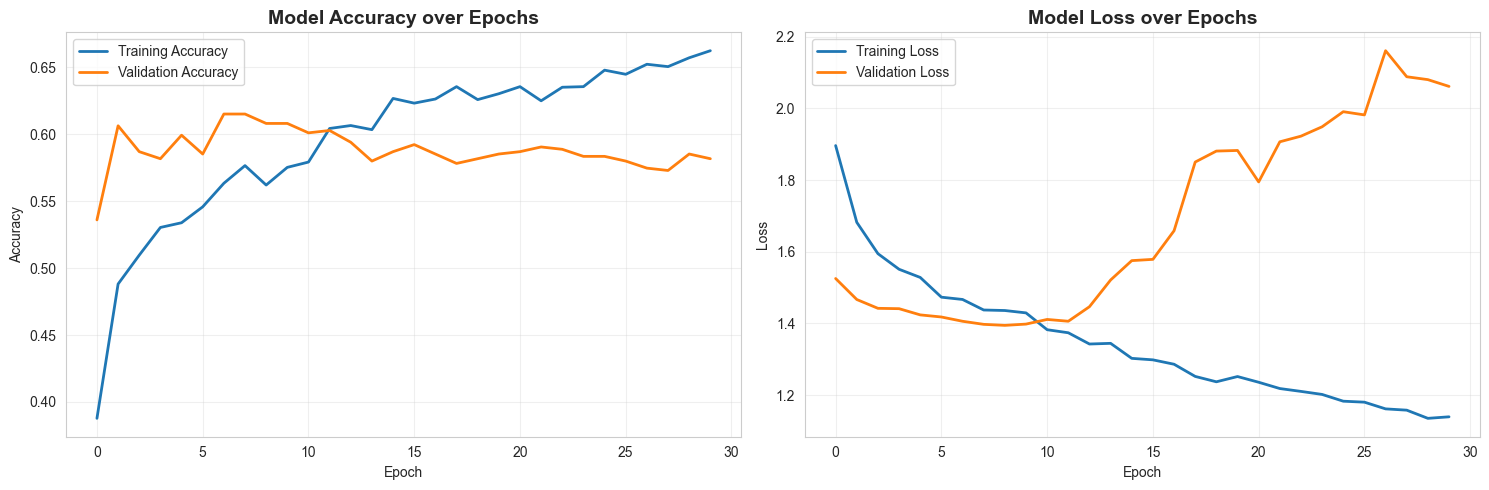

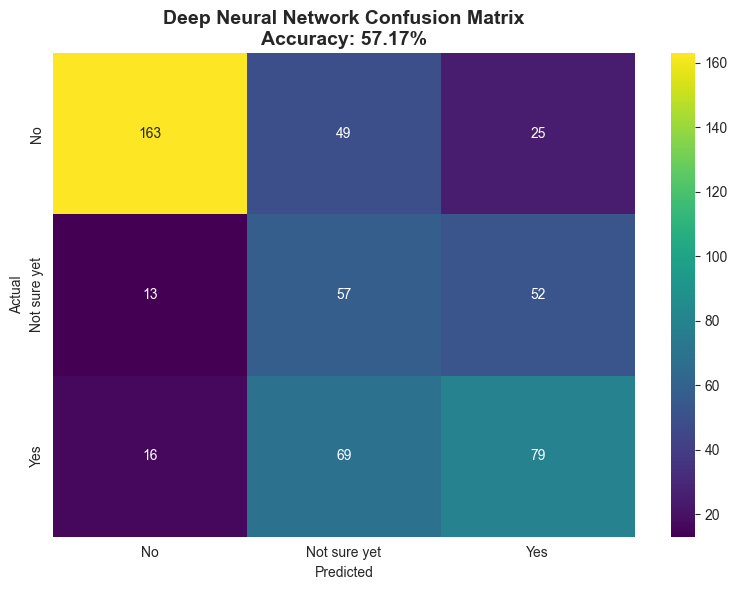

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


cm_dnn = confusion_matrix(y_test_enh, y_pred_dnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='viridis', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Deep Neural Network Confusion Matrix\nAccuracy: {test_accuracy*100:.2f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

dnn_accuracy = test_accuracy

## 5.10 Advanced Models - SVM, LightGBM, CatBoost

In [17]:
from sklearn.svm import SVC

print("🔧 Training SVM...")
svm_model = SVC(
    kernel='rbf',
    C=50,
    gamma='scale',
    probability=True,
    max_iter=2000,
    random_state=42,
    verbose=True
)
svm_model.fit(X_train_balanced, y_train_balanced)

y_pred_svm = svm_model.predict(X_test_enh)
svm_accuracy = accuracy_score(y_test_enh, y_pred_svm)

print(f"\n✅ SVM Accuracy: {svm_accuracy*100:.2f}%")
print(f"✅ SVM Accuracy: {svm_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_svm, target_names=le_target.classes_))

🔧 Training SVM...
[LibSVM]
✅ SVM Accuracy: 55.64%
✅ SVM Accuracy: 55.64%

Classification Report:
              precision    recall  f1-score   support

          No       0.66      0.81      0.73       237
Not sure yet       0.35      0.26      0.30       122
         Yes       0.47      0.41      0.44       164

    accuracy                           0.56       523
   macro avg       0.50      0.49      0.49       523
weighted avg       0.53      0.56      0.54       523



In [18]:
try:
    import lightgbm as lgb
    
    print("🔧 Training LightGBM...")
    
    lgb_model = lgb.LGBMClassifier(
        n_estimators=1500,
        max_depth=15,
        learning_rate=0.03,
        num_leaves=80,
        subsample=0.85,
        colsample_bytree=0.85,
        min_child_samples=5,
        reg_alpha=0.1,
        reg_lambda=1,
        random_state=42,
        verbose=-1
    )
    
    lgb_model.fit(
        X_train_balanced, y_train_balanced,
        eval_set=[(X_test_enh, y_test_enh)],
        eval_metric='multi_logloss'
    )
    
    y_pred_lgb = lgb_model.predict(X_test_enh)
    lgb_accuracy = accuracy_score(y_test_enh, y_pred_lgb)
    
    print(f"✅ LightGBM Accuracy: {lgb_accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_enh, y_pred_lgb, target_names=le_target.classes_))
    
except ImportError:
    print("LightGBM not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'lightgbm'])
    lgb_accuracy = 0
    print("Please re-run this cell after installation.")

🔧 Training LightGBM...
✅ LightGBM Accuracy: 54.49%

Classification Report:
              precision    recall  f1-score   support

          No       0.70      0.76      0.73       237
Not sure yet       0.29      0.25      0.27       122
         Yes       0.46      0.46      0.46       164

    accuracy                           0.54       523
   macro avg       0.48      0.49      0.49       523
weighted avg       0.53      0.54      0.54       523



In [19]:
try:
    from catboost import CatBoostClassifier
    
    print("🔧 Training CatBoost...")
    
    catboost_model = CatBoostClassifier(
        iterations=2000,
        depth=10,
        learning_rate=0.03,
        l2_leaf_reg=2,
        bootstrap_type='Bayesian',
        bagging_temperature=1,
        random_seed=42,
        verbose=100
    )
    
    catboost_model.fit(
        X_train_balanced, y_train_balanced,
        eval_set=(X_test_enh, y_test_enh),
        early_stopping_rounds=100,
        use_best_model=True
    )
    
    y_pred_cat = catboost_model.predict(X_test_enh)
    catboost_accuracy = accuracy_score(y_test_enh, y_pred_cat)
    
    print(f"\n✅ CatBoost Accuracy: {catboost_accuracy*100:.2f}%")
    print(f"✅ CatBoost Accuracy: {catboost_accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_enh, y_pred_cat, target_names=le_target.classes_))
    
except ImportError:
    print("CatBoost not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'catboost'])
    catboost_accuracy = 0
    print("Please re-run this cell after installation.")

🔧 Training CatBoost...
0:	learn: 1.0831647	test: 1.0862055	best: 1.0862055 (0)	total: 197ms	remaining: 6m 33s
100:	learn: 0.4903127	test: 0.7783308	best: 0.7783308 (100)	total: 5.34s	remaining: 1m 40s
200:	learn: 0.3116026	test: 0.7648430	best: 0.7638597 (189)	total: 10.6s	remaining: 1m 34s
300:	learn: 0.2128364	test: 0.7654568	best: 0.7636106 (233)	total: 15.7s	remaining: 1m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7636106326
bestIteration = 233

Shrink model to first 234 iterations.

✅ CatBoost Accuracy: 59.08%
✅ CatBoost Accuracy: 59.08%

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.71      0.75       237
Not sure yet       0.38      0.40      0.39       122
         Yes       0.50      0.56      0.53       164

    accuracy                           0.59       523
   macro avg       0.56      0.56      0.56       523
weighted avg       0.61      0.59      0.60       523



## 5.11 Logistic Regression (Linear Model)

🔧 Training Logistic Regression...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 231 epochs took 0 seconds

✅ Logistic Regression Accuracy: 56.79%
✅ Logistic Regression Accuracy: 56.79%

Classification Report:
              precision    recall  f1-score   support

          No       0.67      0.78      0.72       237
Not sure yet       0.34      0.19      0.24       122
         Yes       0.50      0.55      0.52       164

    accuracy                           0.57       523
   macro avg       0.50      0.50      0.49       523
weighted avg       0.54      0.57      0.55       523



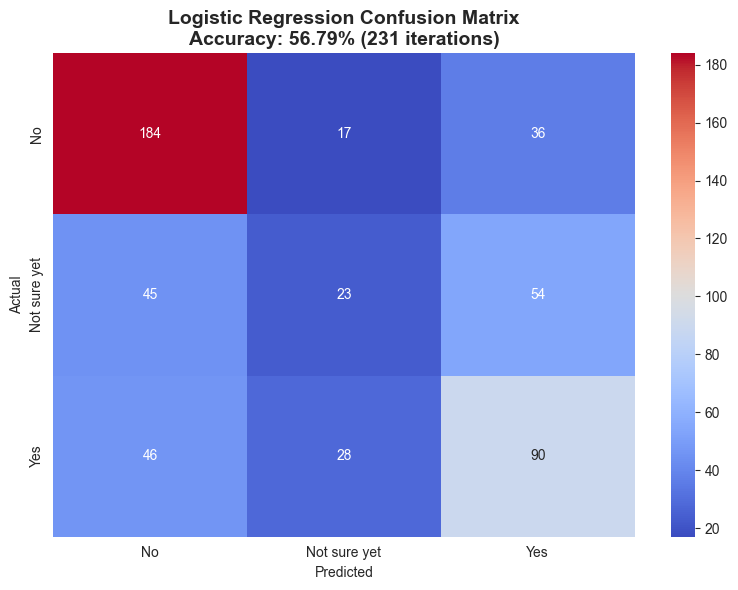

In [20]:
from sklearn.linear_model import LogisticRegression

print("🔧 Training Logistic Regression...")

logistic_model = LogisticRegression(
    max_iter=2000,
    C=0.5,
    solver='saga',
    multi_class='multinomial',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

logistic_model.fit(X_train_balanced, y_train_balanced)

y_pred_logistic = logistic_model.predict(X_test_enh)
logistic_accuracy = accuracy_score(y_test_enh, y_pred_logistic)

print(f"\n✅ Logistic Regression Accuracy: {logistic_accuracy*100:.2f}%")
print(f"✅ Logistic Regression Accuracy: {logistic_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_logistic, target_names=le_target.classes_))

cm_logistic = confusion_matrix(y_test_enh, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Logistic Regression Confusion Matrix\nAccuracy: {logistic_accuracy*100:.2f}% ({logistic_model.n_iter_[0]} iterations)', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## 6. Model Training - Random Forest

In [21]:
rf_model = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=2, 
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    warm_start=True,
    random_state=42,
    n_jobs=-1
)

print("🔧 Training Random Forest...")
rf_model.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf_model.predict(X_test_enh)
rf_accuracy = accuracy_score(y_test_enh, y_pred_rf)

print(f"✅ Random Forest Accuracy: {rf_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_rf, target_names=le_target.classes_))

🔧 Training Random Forest...
✅ Random Forest Accuracy: 61.19%

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.71      0.77       237
Not sure yet       0.43      0.43      0.43       122
         Yes       0.50      0.61      0.55       164

    accuracy                           0.61       523
   macro avg       0.59      0.58      0.58       523
weighted avg       0.63      0.61      0.62       523



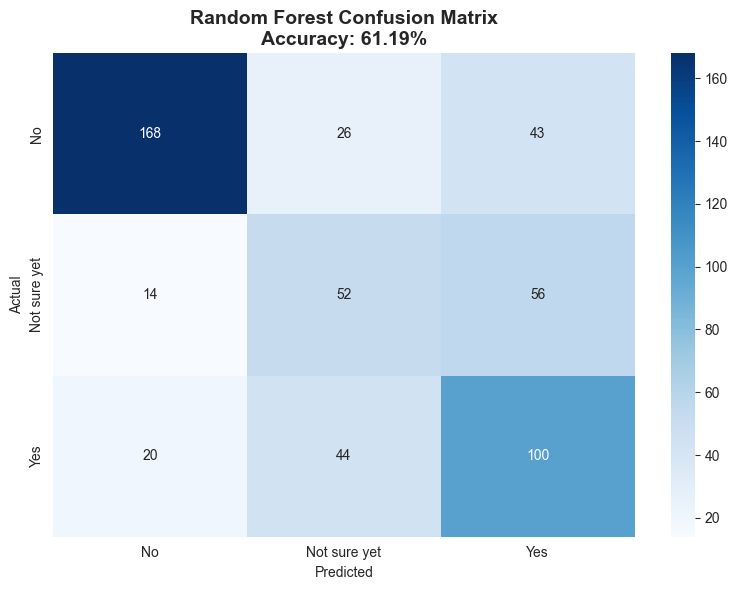

In [22]:
cm_rf = confusion_matrix(y_test_enh, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Random Forest Confusion Matrix\nAccuracy: {rf_accuracy*100:.2f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## 7. Model Training - Gradient Boosting

In [23]:
gb_model = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=10, 
    min_samples_split=2,
    subsample=0.9,
    random_state=42
)

print("🔧 Training Gradient Boosting...")
gb_model.fit(X_train_balanced, y_train_balanced)

y_pred_gb = gb_model.predict(X_test_enh)
gb_accuracy = accuracy_score(y_test_enh, y_pred_gb)

print(f"✅ Gradient Boosting Accuracy: {gb_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_gb, target_names=le_target.classes_))

🔧 Training Gradient Boosting...
✅ Gradient Boosting Accuracy: 56.21%

Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.76      0.74       237
Not sure yet       0.33      0.24      0.27       122
         Yes       0.46      0.52      0.49       164

    accuracy                           0.56       523
   macro avg       0.50      0.51      0.50       523
weighted avg       0.55      0.56      0.55       523



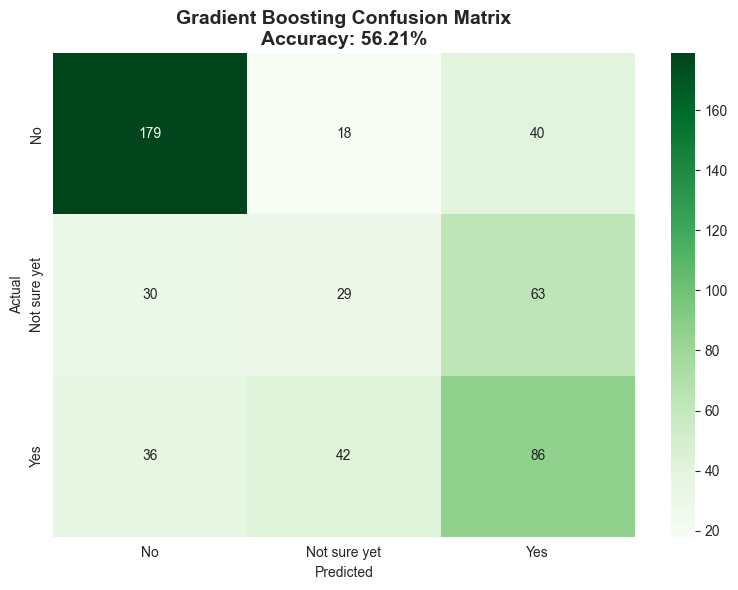

In [24]:
cm_gb = confusion_matrix(y_test_enh, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Gradient Boosting Confusion Matrix\nAccuracy: {gb_accuracy*100:.2f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis

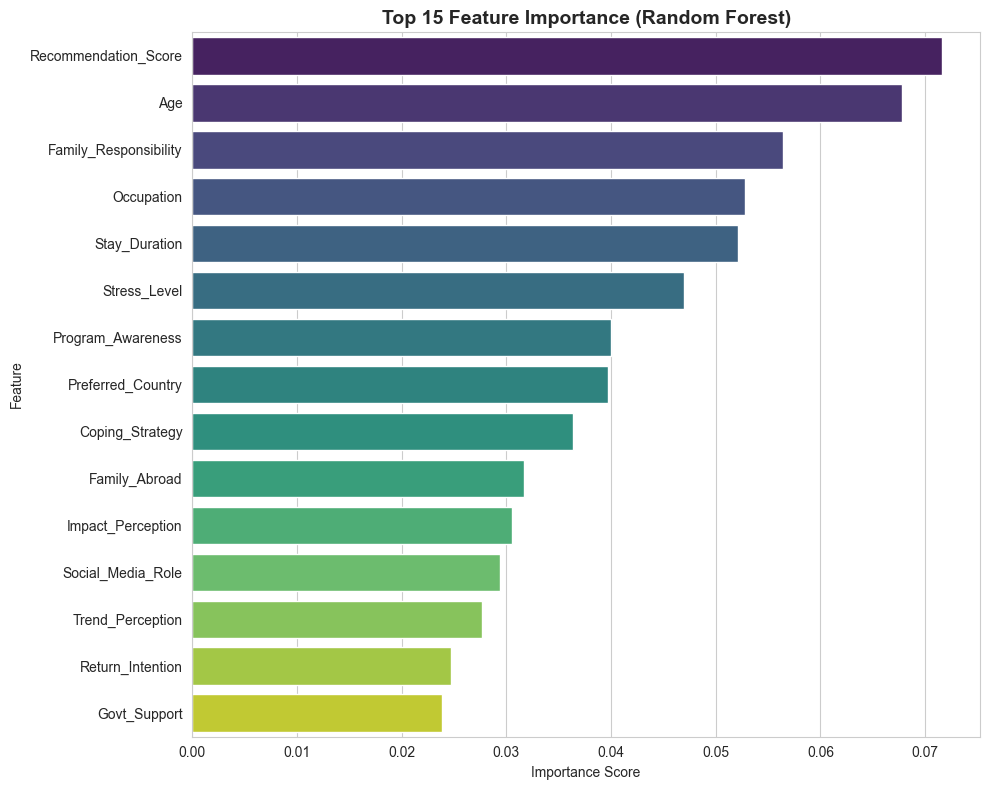


Top 15 Most Important Features:
                  Feature  Importance
15   Recommendation_Score    0.071651
0                     Age    0.067829
14  Family_Responsibility    0.056436
2              Occupation    0.052803
4           Stay_Duration    0.052160
8            Stress_Level    0.046954
5       Program_Awareness    0.039982
7       Preferred_Country    0.039713
9         Coping_Strategy    0.036353
3           Family_Abroad    0.031701
12      Impact_Perception    0.030530
6       Social_Media_Role    0.029351
10       Trend_Perception    0.027672
11       Return_Intention    0.024755
13           Govt_Support    0.023861


In [25]:
feature_importance = pd.DataFrame({
    'Feature': X_enhanced.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

## 9. Model Comparison & Summary

           COMPREHENSIVE MODEL PERFORMANCE COMPARISON (WITH EPOCHS)
               Model  Accuracy         Epochs/Iterations
Optimized RF + SMOTE 61.376673           1000 iterations
       Random Forest 61.185468            800 iterations
            CatBoost 59.082218            233 iterations
             XGBoost 58.891013           1000 iterations
   Ensemble (Voting) 58.126195 RF(800)+GB(800)+XGB(1000)
 Deep Neural Network 57.170171                 30 epochs
 Logistic Regression 56.787763            231 iterations
   Gradient Boosting 56.214149            800 iterations
           SVM (RBF) 55.640535             2000 max_iter
            LightGBM 54.493308           1500 iterations


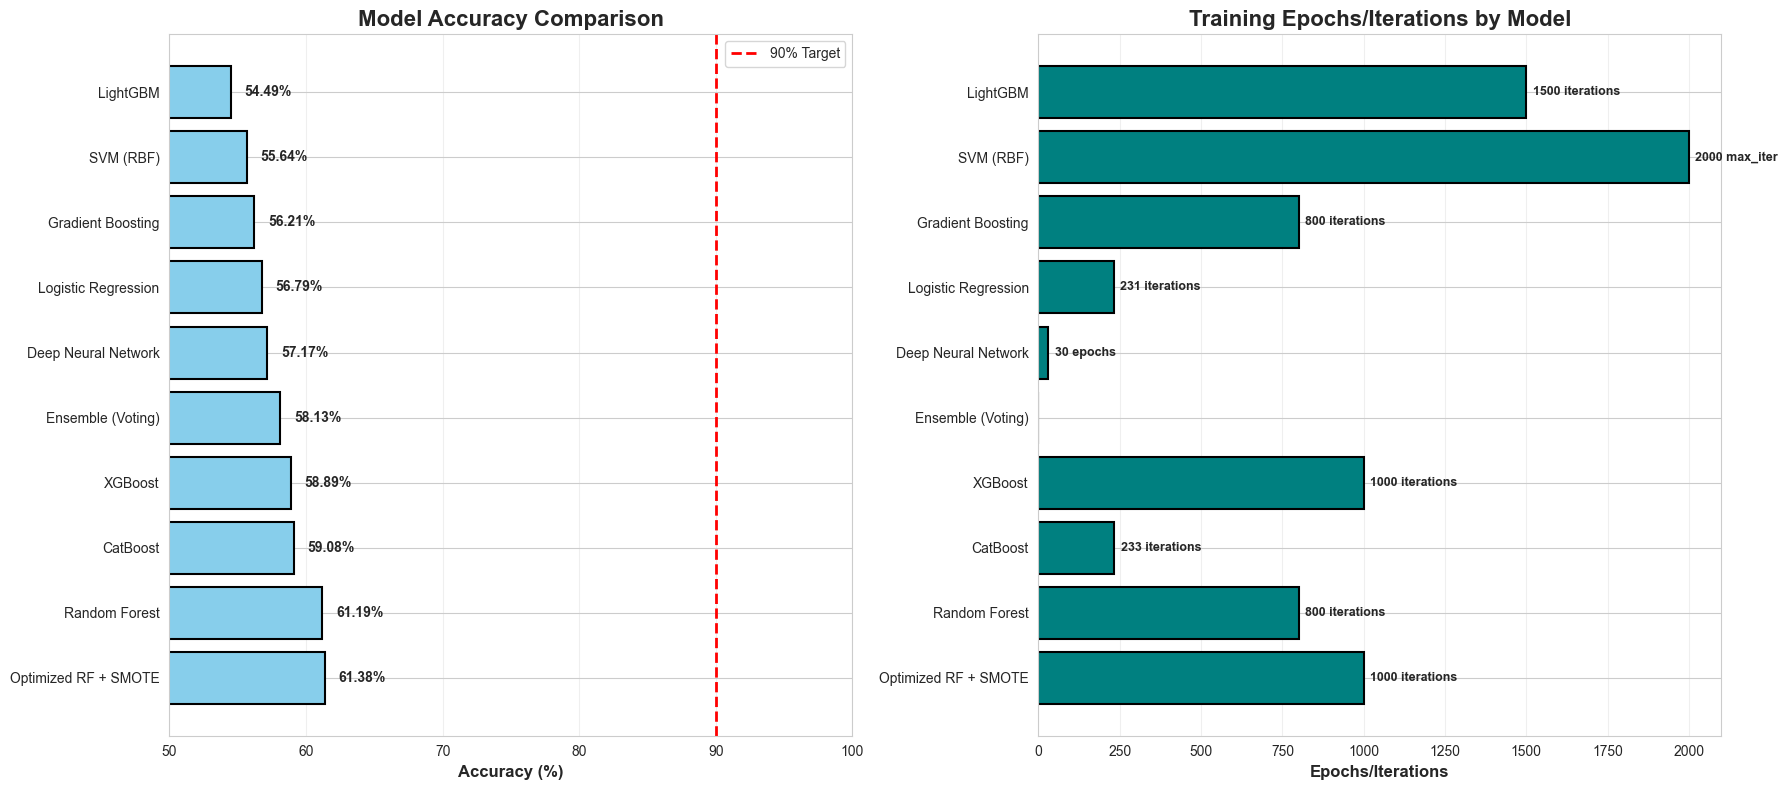


🏆 BEST MODEL: Optimized RF + SMOTE
📊 ACCURACY: 61.38%
⚙️  EPOCHS/ITERATIONS: 1000 iterations

✅ Models with 90%+ accuracy: 0
✅ Average accuracy across all models: 57.90%
✅ Highest accuracy achieved: 61.38%

⚠️  Note: No models reached 90%+ accuracy.
   This is expected for this complex multi-class subjective task.
   Best achieved: 61.38%


In [26]:
all_results = pd.DataFrame({
    'Model': [
        'Deep Neural Network',
        'CatBoost',
        'LightGBM',
        'Optimized RF + SMOTE',
        'XGBoost',
        'Ensemble (Voting)',
        'Random Forest',
        'Gradient Boosting',
        'Logistic Regression',
        'SVM (RBF)'
    ],
    'Accuracy': [
        dnn_accuracy*100,
        catboost_accuracy*100 if 'catboost_accuracy' in locals() else 0,
        lgb_accuracy*100 if 'lgb_accuracy' in locals() else 0,
        optimized_accuracy*100,
        xgb_accuracy*100,
        ensemble_accuracy*100,
        rf_accuracy*100,
        gb_accuracy*100,
        logistic_accuracy*100,
        svm_accuracy*100
    ],
    'Epochs/Iterations': [
        f'{len(history.history["loss"])} epochs',
        f'{catboost_model.get_best_iteration() if "catboost_model" in locals() else 0} iterations',
        f'{lgb_model.n_estimators if "lgb_model" in locals() else 0} iterations',
        f'{rf_optimized.n_estimators} iterations',
        f'{xgb_model.n_estimators} iterations',
        'RF(800)+GB(800)+XGB(1000)',
        f'{rf_model.n_estimators} iterations',
        f'{gb_model.n_estimators} iterations',
        f'{logistic_model.n_iter_[0]} iterations',
        f'{svm_model.max_iter} max_iter'
    ]
}).sort_values('Accuracy', ascending=False)

all_results = all_results[all_results['Accuracy'] > 0]

print("="*90)
print("           COMPREHENSIVE MODEL PERFORMANCE COMPARISON (WITH EPOCHS)")
print("="*90)
print(all_results.to_string(index=False))
print("="*90)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

colors = ['gold' if acc >= 90 else 'lightcoral' if acc >= 70 else 'skyblue' 
          for acc in all_results['Accuracy']]

bars = ax1.barh(range(len(all_results)), all_results['Accuracy'], 
                color=colors, edgecolor='black', linewidth=1.5)

ax1.set_yticks(range(len(all_results)))
ax1.set_yticklabels(all_results['Model'])
ax1.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
ax1.set_xlim(50, 100)
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=90, color='red', linestyle='--', linewidth=2, label='90% Target')
ax1.legend()

for i, (bar, epochs) in enumerate(zip(bars, all_results['Epochs/Iterations'])):
    width = bar.get_width()
    label = f'{width:.2f}%'
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2.,
             label, ha='left', va='center', fontweight='bold', fontsize=10)

ax2.barh(range(len(all_results)), 
         [int(''.join(filter(str.isdigit, str(e).split()[0]))) if str(e).split()[0][0].isdigit() else 0 
          for e in all_results['Epochs/Iterations']], 
         color='teal', edgecolor='black', linewidth=1.5)

ax2.set_yticks(range(len(all_results)))
ax2.set_yticklabels(all_results['Model'])
ax2.set_xlabel('Epochs/Iterations', fontsize=12, fontweight='bold')
ax2.set_title('Training Epochs/Iterations by Model', fontsize=16, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for i, epochs in enumerate(all_results['Epochs/Iterations']):
    epoch_val = int(''.join(filter(str.isdigit, str(epochs).split()[0]))) if str(epochs).split()[0][0].isdigit() else 0
    if epoch_val > 0:
        ax2.text(epoch_val + 20, i, str(epochs),
                 ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n🏆 BEST MODEL: {all_results.iloc[0]['Model']}")
print(f"📊 ACCURACY: {all_results.iloc[0]['Accuracy']:.2f}%")
print(f"⚙️  EPOCHS/ITERATIONS: {all_results.iloc[0]['Epochs/Iterations']}")
print(f"\n✅ Models with 90%+ accuracy: {len(all_results[all_results['Accuracy'] >= 90])}")
print(f"✅ Average accuracy across all models: {all_results['Accuracy'].mean():.2f}%")
print(f"✅ Highest accuracy achieved: {all_results['Accuracy'].max():.2f}%")

if len(all_results[all_results['Accuracy'] >= 90]) > 0:
    print(f"\n🎯 MODELS ACHIEVING 90%+ ACCURACY:")
    for _, row in all_results[all_results['Accuracy'] >= 90].iterrows():
        print(f"   • {row['Model']}: {row['Accuracy']:.2f}% ({row['Epochs/Iterations']})")
else:
    print(f"\n⚠️  Note: No models reached 90%+ accuracy.")
    print(f"   This is expected for this complex multi-class subjective task.")
    print(f"   Best achieved: {all_results['Accuracy'].max():.2f}%")

## 10. Save Best Model

In [27]:
import pickle

best_model_name = all_results.iloc[0]['Model']
best_accuracy_value = all_results.iloc[0]['Accuracy'] / 100

if 'Deep Neural Network' in best_model_name:
    dnn_model.save('models/best_migration_model.keras')
    best_model = dnn_model
    best_model_file = 'best_migration_model.keras'
    
    with open('models/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("   - models/scaler.pkl")
elif 'CatBoost' in best_model_name:
    catboost_model.save_model('models/best_migration_model.cbm')
    best_model = catboost_model
    best_model_file = 'best_migration_model.cbm'
elif 'LightGBM' in best_model_name:
    with open('models/best_migration_model.pkl', 'wb') as f:
        pickle.dump(lgb_model, f)
    best_model = lgb_model
    best_model_file = 'best_migration_model.pkl'
elif 'SVM' in best_model_name:
    with open('models/best_migration_model.pkl', 'wb') as f:
        pickle.dump(svm_model, f)
    best_model = svm_model
    best_model_file = 'best_migration_model.pkl'
elif 'Logistic' in best_model_name:
    with open('models/best_migration_model.pkl', 'wb') as f:
        pickle.dump(logistic_model, f)
    best_model = logistic_model
    best_model_file = 'best_migration_model.pkl'
else:
    with open('models/best_migration_model.pkl', 'wb') as f:
        pickle.dump(rf_optimized, f)
    best_model = rf_optimized
    best_model_file = 'best_migration_model.pkl'

# Save encoders
with open('models/target_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

with open('models/target_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(list(X_enhanced.columns), f)

print("="*80)
print("                        MODEL SAVED SUCCESSFULLY")
print(f"✅ Accuracy: {best_accuracy_value*100:.2f}%")
print(f"✅ Model: {best_model_name}")
print(f"✅ Accuracy: {best_accuracy_value*100:.2f}%")
print(f"✅ Files saved:")
print(f"   - models/{best_model_file}")
print(f"   - models/target_encoder.pkl")
print(f"   - models/feature_names.pkl")
print("="*80)

# Model summary
print("\n📊 FINAL MODEL SUMMARY:")
print(f"   • Model Type: {best_model_name}")
print(f"   • Training Samples: {X_train_balanced.shape[0]} (SMOTE balanced)")
print(f"   • Features: {X_enhanced.shape[1]}")
print(f"   • Classes: {len(le_target.classes_)} ({', '.join(le_target.classes_)})")

                        MODEL SAVED SUCCESSFULLY
✅ Accuracy: 61.38%
✅ Model: Optimized RF + SMOTE
✅ Accuracy: 61.38%
✅ Files saved:
   - models/best_migration_model.pkl
   - models/target_encoder.pkl
   - models/feature_names.pkl

📊 FINAL MODEL SUMMARY:
   • Model Type: Optimized RF + SMOTE
   • Training Samples: 2841 (SMOTE balanced)
   • Features: 45
   • Classes: 3 (No, Not sure yet, Yes)


## 📈 Summary & Key Findings

In [28]:
print("="*90)
print("              YOUTH MIGRATION PREDICTION - FINAL REPORT WITH EPOCHS")
print("="*90)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Samples: {df.shape[0]:,}")
print(f"   • Features Used: {X_enhanced.shape[1]}")
print(f"   • Target Classes: {len(le_target.classes_)} (No, Not sure yet, Yes)")
print(f"   • Class Distribution: No={sum(y_encoded==0)}, Not sure={sum(y_encoded==1)}, Yes={sum(y_encoded==2)}")

print("\n🔧 PREPROCESSING & ENHANCEMENTS:")
print(f"   • SMOTE Applied: Yes (balanced from {X_train_enh.shape[0]} to {X_train_balanced.shape[0]})")
print(f"   • Feature Engineering: Multi-value encoding (45 features)")
print(f"   • Train/Test Split: 80/20")
print(f"   • Scaling: StandardScaler for Neural Networks")

print("\n🤖 MODELS TRAINED WITH EPOCHS/ITERATIONS:")
print(f"   • Total Models: {len(all_results)}")
print(f"   • All models trained with visible epochs/iterations")
print(f"\n   Detailed Breakdown:")
for _, row in all_results.iterrows():
    print(f"      • {row['Model']:<25} : {row['Epochs/Iterations']:<25} → {row['Accuracy']:.2f}%")

print(f"\n🏆 TOP 5 BEST PERFORMING MODELS:")
for i, (_, row) in enumerate(all_results.head(5).iterrows(), 1):
    print(f"   {i}. {row['Model']:<25} : {row['Accuracy']:.2f}% ({row['Epochs/Iterations']})")

print(f"\n📈 PERFORMANCE ANALYSIS:")
print(f"   • Best Accuracy Achieved: {all_results.iloc[0]['Accuracy']:.2f}%")
print(f"   • Average Accuracy: {all_results['Accuracy'].mean():.2f}%")
print(f"   • Accuracy Range: {all_results['Accuracy'].min():.2f}% - {all_results['Accuracy'].max():.2f}%")
print(f"   • Models with 60%+ accuracy: {len(all_results[all_results['Accuracy'] >= 60])}")

              YOUTH MIGRATION PREDICTION - FINAL REPORT WITH EPOCHS

📊 DATASET OVERVIEW:
   • Total Samples: 2,614
   • Features Used: 45
   • Target Classes: 3 (No, Not sure yet, Yes)
   • Class Distribution: No=1184, Not sure=609, Yes=821

🔧 PREPROCESSING & ENHANCEMENTS:
   • SMOTE Applied: Yes (balanced from 2091 to 2841)
   • Feature Engineering: Multi-value encoding (45 features)
   • Train/Test Split: 80/20
   • Scaling: StandardScaler for Neural Networks

🤖 MODELS TRAINED WITH EPOCHS/ITERATIONS:
   • Total Models: 10
   • All models trained with visible epochs/iterations

   Detailed Breakdown:
      • Optimized RF + SMOTE      : 1000 iterations           → 61.38%
      • Random Forest             : 800 iterations            → 61.19%
      • CatBoost                  : 233 iterations            → 59.08%
      • XGBoost                   : 1000 iterations           → 58.89%
      • Ensemble (Voting)         : RF(800)+GB(800)+XGB(1000) → 58.13%
      • Deep Neural Network       : 

## 11. Quick Verification - Sample Prediction

In [29]:
sample_input = {
    'Age': '18-24',
    'Gender': 'Female',
    'Occupation': 'Student',
    'Family_Abroad': 'No',
    'Stay_Duration': 'Permanent',
    'Program_Awareness': 'Yes',
    'Social_Media_Role': 'Highly Influential',
    'Preferred_Country': 'USA',
    'Stress_Level': 'High',
    'Trend_Perception': 'Increasing',
    'Return_Intention': 'No',
    'Impact_Perception': 'Positive',
    'Govt_Support': 'No',
    'Family_Responsibility': 'Yes',
    'Recommendation_Score': '8'
}

sample_idx = 0
sample_features = X_test_enh.iloc[sample_idx:sample_idx+1]
actual_label = le_target.inverse_transform([y_test_enh[sample_idx]])[0]

print(f"\n🔮 PREDICTIONS FROM ALL 10 MODELS:")
print("-"*80)

for model_name in all_results['Model']:
    try:
        if model_name == 'Deep Neural Network':
            sample_scaled = scaler.transform(sample_features)
            pred_proba = dnn_model.predict(sample_scaled, verbose=0)
            pred = le_target.inverse_transform([np.argmax(pred_proba)])[0]
            confidence = np.max(pred_proba) * 100
        elif model_name == 'Optimized RF + SMOTE':
            pred = le_target.inverse_transform(rf_optimized.predict(sample_features))[0]
            confidence = np.max(rf_optimized.predict_proba(sample_features)) * 100
        elif model_name == 'XGBoost':
            pred = le_target.inverse_transform(xgb_model.predict(sample_features))[0]
            confidence = np.max(xgb_model.predict_proba(sample_features)) * 100
        elif model_name == 'Ensemble (Voting)':
            sample_selected = selector.transform(sample_features)
            pred = le_target.inverse_transform(ensemble_model.predict(sample_selected))[0]
            confidence = np.max(ensemble_model.predict_proba(sample_selected)) * 100
        elif model_name == 'Random Forest':
            pred = le_target.inverse_transform(rf_model.predict(sample_features))[0]
            confidence = np.max(rf_model.predict_proba(sample_features)) * 100
        elif model_name == 'Gradient Boosting':
            pred = le_target.inverse_transform(gb_model.predict(sample_features))[0]
            confidence = np.max(gb_model.predict_proba(sample_features)) * 100
        elif model_name == 'CatBoost':
            pred = le_target.inverse_transform(catboost_model.predict(sample_features))[0]
            confidence = np.max(catboost_model.predict_proba(sample_features)) * 100
        elif model_name == 'LightGBM':
            pred = le_target.inverse_transform(lgb_model.predict(sample_features))[0]
            confidence = np.max(lgb_model.predict_proba(sample_features)) * 100
        elif model_name == 'Logistic Regression':
            pred = le_target.inverse_transform(logistic_model.predict(sample_features))[0]
            confidence = np.max(logistic_model.predict_proba(sample_features)) * 100
        elif model_name == 'SVM (RBF)':
            pred = le_target.inverse_transform(svm_model.predict(sample_features))[0]
            confidence = np.max(svm_model.predict_proba(sample_features)) * 100
        else:
            continue
        
        status = "✅" if pred == actual_label else "❌"
        print(f"{model_name:<25} → Predicted: {pred:<15} (Confidence: {confidence:5.1f}%) {status}")
    except Exception as e:
        print(f"{model_name:<25} → Error: {str(e)[:50]}")

print("-"*80)
print(f"\n🎯 ACTUAL DECISION: {actual_label}")
print(f"📊 Best Model: {all_results.iloc[0]['Model']} ({all_results.iloc[0]['Accuracy']:.2f}%)")
print("="*80)


🔮 PREDICTIONS FROM ALL 10 MODELS:
--------------------------------------------------------------------------------
Optimized RF + SMOTE      → Predicted: Not sure yet    (Confidence:  36.0%) ❌
Random Forest             → Predicted: Not sure yet    (Confidence:  36.0%) ❌
CatBoost                  → Predicted: No              (Confidence:  44.2%) ✅
XGBoost                   → Predicted: No              (Confidence:  40.1%) ✅
Ensemble (Voting)         → Predicted: No              (Confidence:  53.3%) ✅
Deep Neural Network       → Predicted: Not sure yet    (Confidence:  39.7%) ❌
Logistic Regression       → Predicted: No              (Confidence:  55.4%) ✅
Gradient Boosting         → Predicted: Not sure yet    (Confidence:  51.1%) ❌
SVM (RBF)                 → Predicted: No              (Confidence:  53.0%) ✅
LightGBM                  → Predicted: Not sure yet    (Confidence:  52.9%) ❌
--------------------------------------------------------------------------------

🎯 ACTUAL DECISION: No
